In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


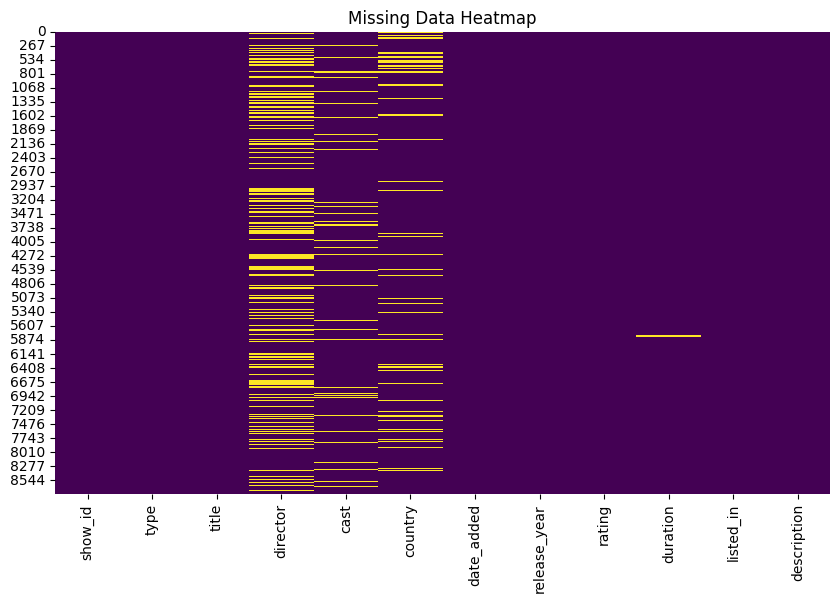

In [3]:
# 1. Heatmap for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

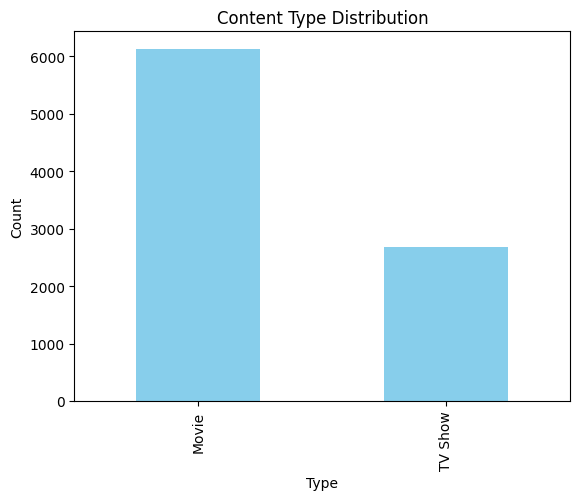

In [4]:
# 2. Content type distribution
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

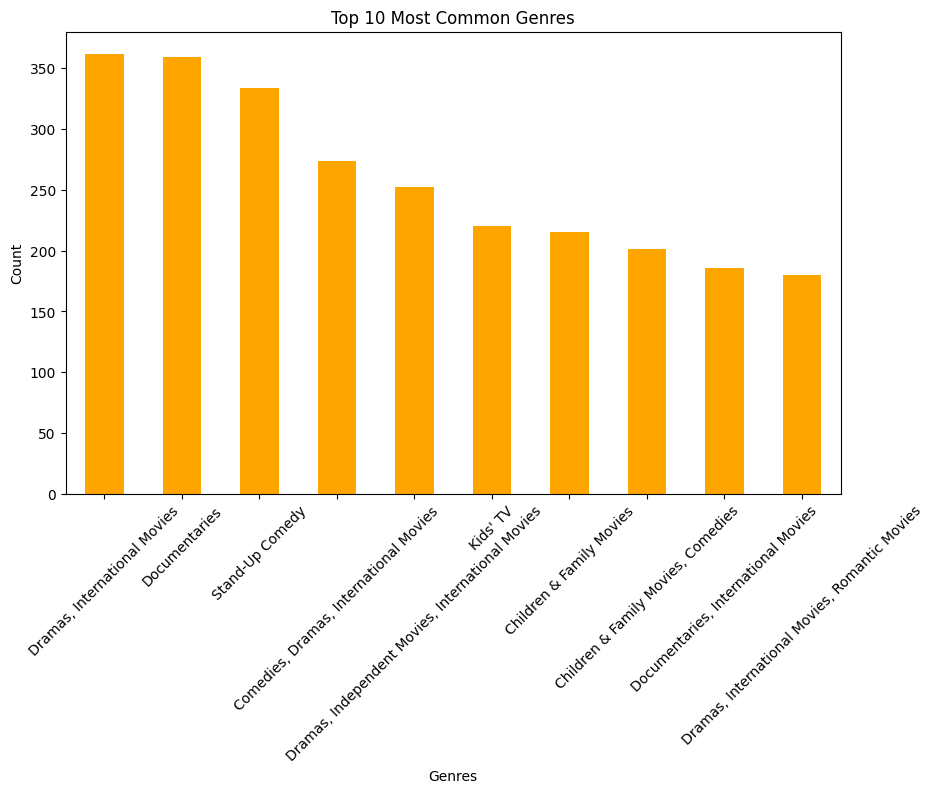

In [5]:
# 3. Most common genres
genres = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

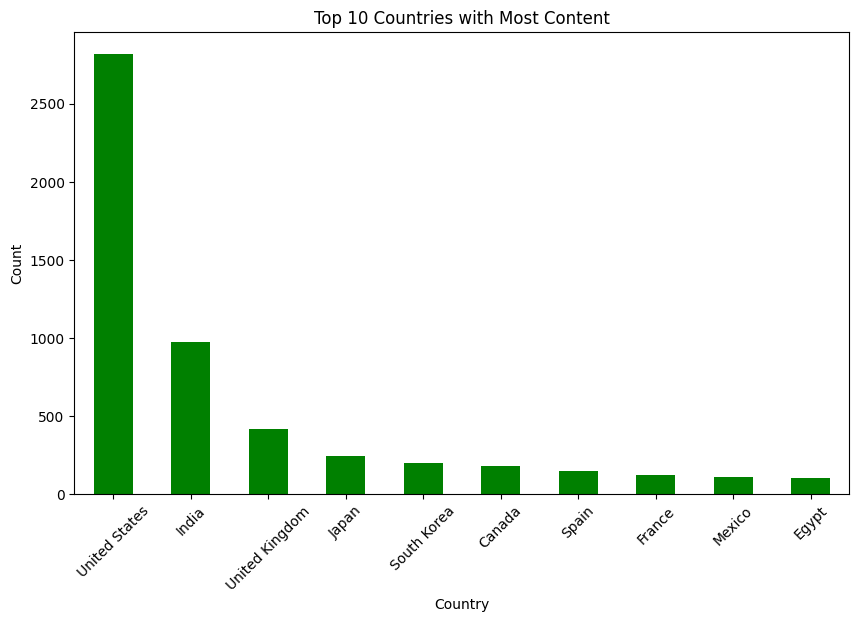

In [6]:
# 4. Top 10 countries with the most content
countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [7]:
country_data = df['country'].value_counts().reset_index()
country_data.columns = ['country', 'count']
fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='count',
    title='Content Distribution by Country',
    color_continuous_scale='viridis'
)
fig.update_layout(title=dict(font=dict(size=20)))
fig.show()

In [8]:
# 5. Average release year
average_release_year = df['release_year'].mean()
print(f"Average Release Year: {int(average_release_year)}")

Average Release Year: 2014


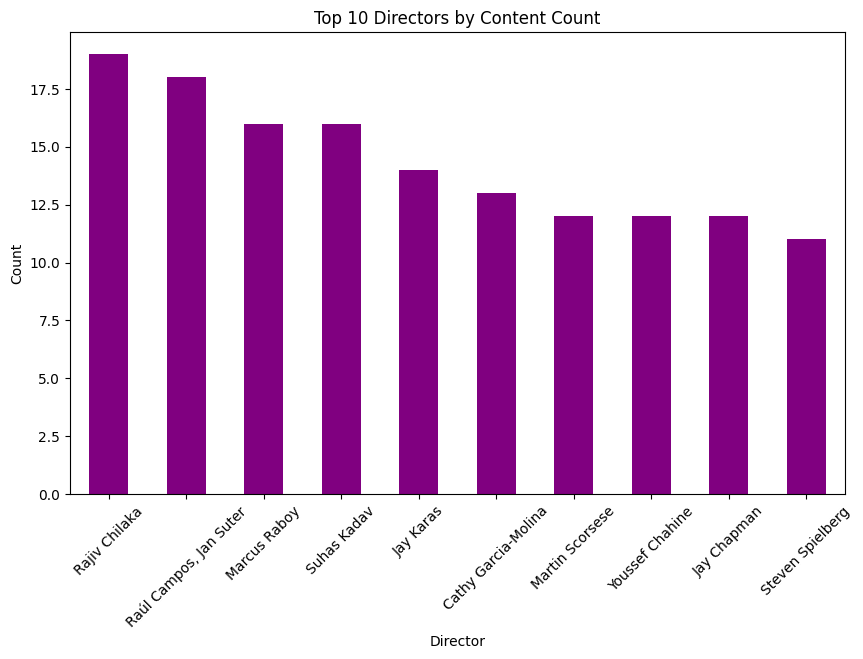

In [9]:
# 6. Top directors by content count
directors = df['director'].dropna().value_counts().head(10)
plt.figure(figsize=(10, 6))
directors.plot(kind='bar', color='purple')
plt.title('Top 10 Directors by Content Count')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

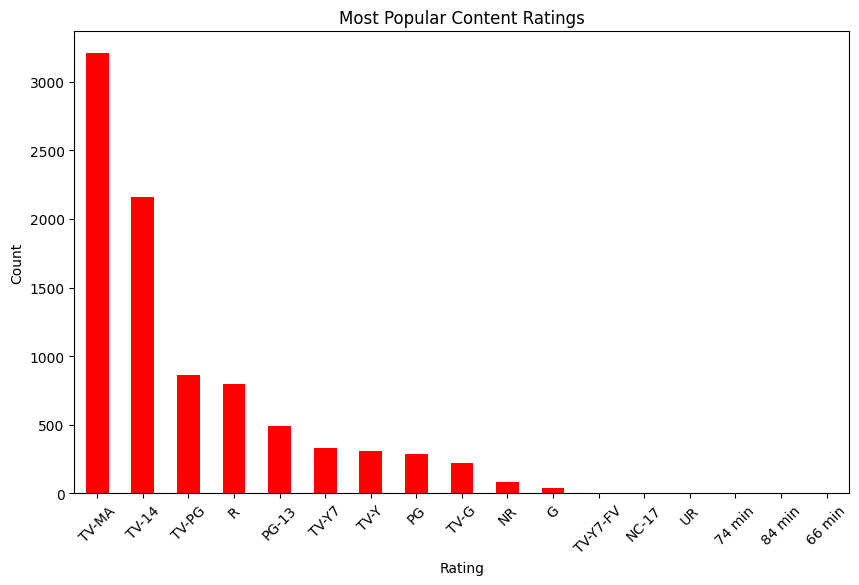

In [10]:
# 7. Most popular content ratings
ratings = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
ratings.plot(kind='bar', color='red')
plt.title('Most Popular Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

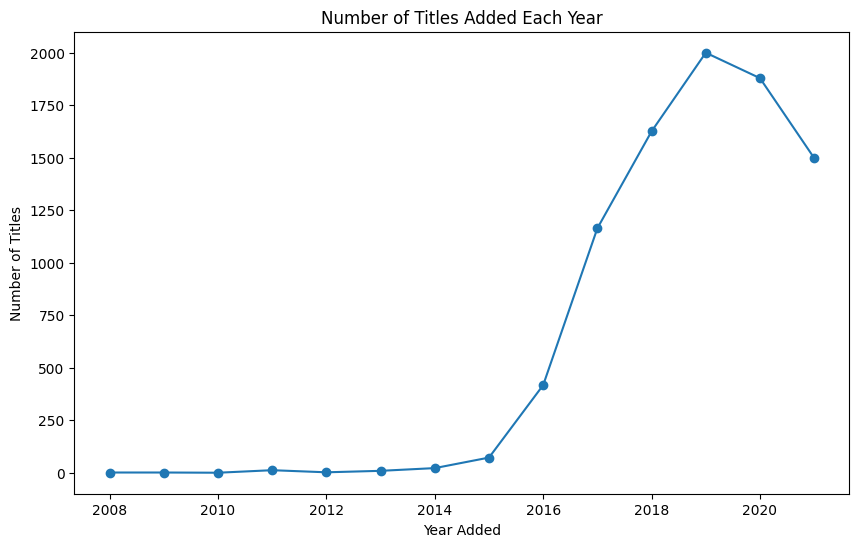

In [11]:
# 8. Count of content added each year
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
year_added = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(year_added.index, year_added.values, marker='o')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

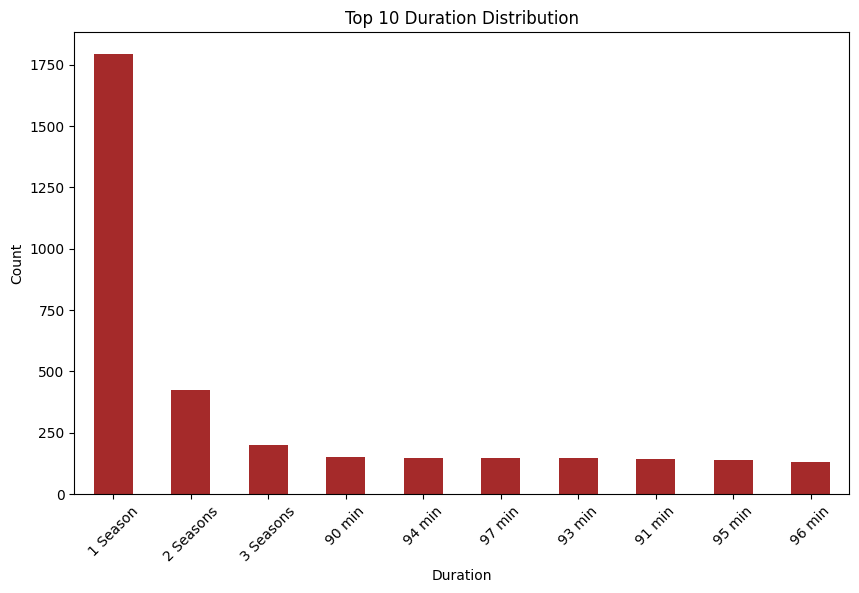

In [12]:
# 9. Distribution of content duration
duration_distribution = df['duration'].value_counts().head(10)
plt.figure(figsize=(10, 6))
duration_distribution.plot(kind='bar', color='brown')
plt.title('Top 10 Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

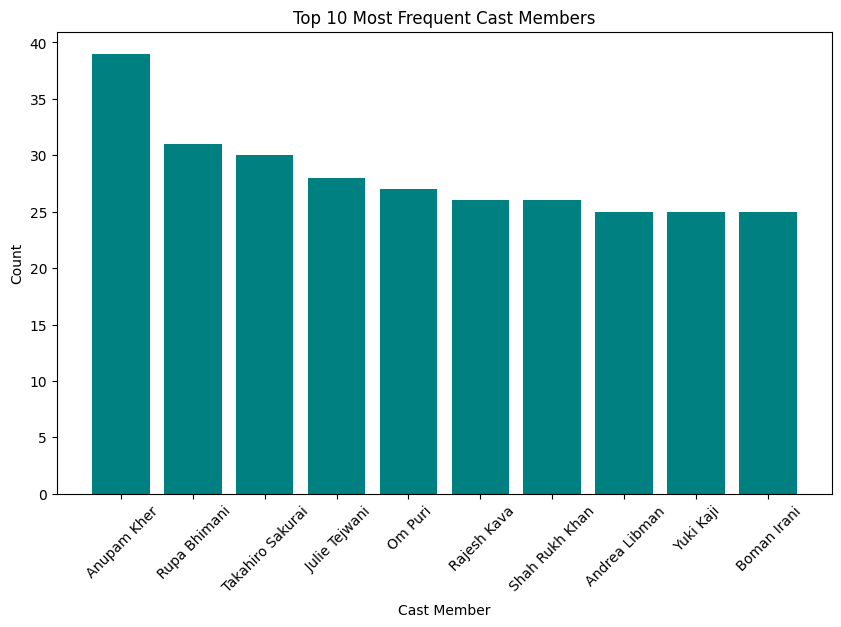

In [13]:
# 10. Most frequent cast members
cast_list = df['cast'].dropna().str.split(',').sum()
cast_count = Counter(cast_list).most_common(10)
cast_names, cast_counts = zip(*cast_count)
plt.figure(figsize=(10, 6))
plt.bar(cast_names, cast_counts, color='teal')
plt.title('Top 10 Most Frequent Cast Members')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

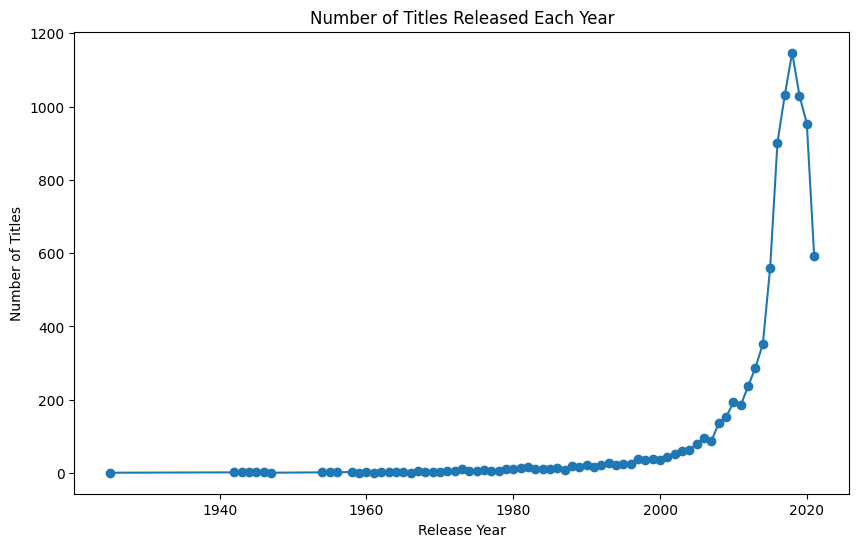

In [14]:
# 11. Count of content per release year
release_year_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(release_year_count.index, release_year_count.values, marker='o')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

In [15]:
# 12. Movies with the longest duration
movies = df[df['type'] == 'Movie']
longest_movies = movies.sort_values('duration', ascending=False).head(5)
print("Movies with Longest Duration:")
print(longest_movies[['title', 'duration']])

Movies with Longest Duration:
                                 title duration
337                    Good Luck Chuck   99 min
6915                           Hangman   99 min
8625             Tremors 5:  Bloodline   99 min
2183              What Keeps You Alive   99 min
721   Rogue Warfare: Death of a Nation   99 min


In [16]:
# 13. TV shows with the most seasons
tv_shows = df[df['type'] == 'TV Show']
most_seasons = tv_shows.sort_values('duration', ascending=False).head(5)
print("TV Shows with Most Seasons:")
print(most_seasons[['title', 'duration']])

TV Shows with Most Seasons:
                              title   duration
1480                     Still Game  9 Seasons
6504       Club Friday The Series 6  9 Seasons
67                Saved by the Bell  9 Seasons
1998               Call the Midwife  9 Seasons
8     The Great British Baking Show  9 Seasons


In [17]:
# 14. Proportion of Movies vs. TV Shows
content_proportion = df['type'].value_counts(normalize=True) * 100
print("Proportion of Movies vs. TV Shows:")
print(content_proportion)

Proportion of Movies vs. TV Shows:
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


In [18]:
# 15. Countries producing the most content for Movies and TV Shows
countries_movies = movies['country'].value_counts().head(10)
countries_tv_shows = tv_shows['country'].value_counts().head(10)
print("Top 10 Countries Producing Movies:")
print(countries_movies)
print("Top 10 Countries Producing TV Shows:")
print(countries_tv_shows)

Top 10 Countries Producing Movies:
country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64
Top 10 Countries Producing TV Shows:
country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: count, dtype: int64


In [19]:
countries_movies = movies['country'].value_counts().head(10).reset_index()
countries_movies.columns = ['country', 'count']
fig_movies = px.choropleth(
    countries_movies,
    locations='country',
    locationmode='country names',
    color='count',
    title='Top 10 Countries Producing Movies',
    color_continuous_scale='Reds'
)
fig_movies.update_layout(title=dict(font=dict(size=20)))
fig_movies.show()

countries_tv_shows = tv_shows['country'].value_counts().head(10).reset_index()
countries_tv_shows.columns = ['country', 'count']
fig_tv_shows = px.choropleth(
    countries_tv_shows,
    locations='country',
    locationmode='country names',
    color='count',
    title='Top 10 Countries Producing TV Shows',
    color_continuous_scale='Purples'
)
fig_tv_shows.update_layout(title=dict(font=dict(size=20)))
fig_tv_shows.show()

print("Top 10 Countries Producing Movies:")
print(countries_movies)
print("Top 10 Countries Producing TV Shows:")
print(countries_tv_shows)

Top 10 Countries Producing Movies:
          country  count
0   United States   2058
1           India    893
2  United Kingdom    206
3          Canada    122
4           Spain     97
5           Egypt     92
6         Nigeria     86
7       Indonesia     77
8          Turkey     76
9           Japan     76
Top 10 Countries Producing TV Shows:
          country  count
0   United States    760
1  United Kingdom    213
2           Japan    169
3     South Korea    158
4           India     79
5          Taiwan     68
6          Canada     59
7          France     49
8       Australia     48
9           Spain     48
